# Pair Programming Decision Tree

Hasta ahora hemos ajustado el modelo usando una Regresión Logística, pero como hemos aprendido, podemos usar el Decision Tree en este tipo de problemas. Los objetivos de este pair programming :

- Ajustad un modelo de Decision Tree a nuestros datos.

- Calculad las métricas a nuestro nuevo modelo.

In [1]:
# Tratamiento de datos
import numpy as np
import pandas as pd

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

# Configuración warnings
import warnings
warnings.filterwarnings('once')

In [2]:
# Para ejecutar en google colab
#from google.colab import drive
#drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# Para conectar con Drive
#%cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


In [5]:
# Abrimos el archivo sin estandarizar
df= pd.read_csv('../files/df_sin_estandarizar.csv', index_col=0)
df.head()

,continente_map,year,life_expectancy,adult_mortality,infant_deaths,alcohol,bmi,diphtheria,hiv/aids,gdp,income_composition_of_resources,schooling
0,3,2015.0,65.0,263.0,62.0,0.01,19.1,65.0,0.1,584.259210,0.479,10.1
1,3,2014.0,59.9,271.0,64.0,0.01,18.6,62.0,0.1,612.696514,0.476,10.0
2,3,2013.0,59.9,268.0,66.0,0.01,18.1,64.0,0.1,631.744976,0.470,9.9
3,3,2012.0,59.5,272.0,69.0,0.01,17.6,67.0,0.1,669.959000,0.463,9.8
4,3,2011.0,59.2,275.0,71.0,0.01,17.2,68.0,0.1,63.537231,0.454,9.5


In [6]:
# Separamos X e Y
X = df.drop("life_expectancy", axis = 1)
y = df["life_expectancy"]

In [7]:
# Generamos los conjuntos de train y test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

## Ajustamos el modelo

In [8]:
# creamos el objeto del modelo arbol
arbol = DecisionTreeRegressor(random_state =0)

# ajustamos el modelo con el método .fit()
arbol.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

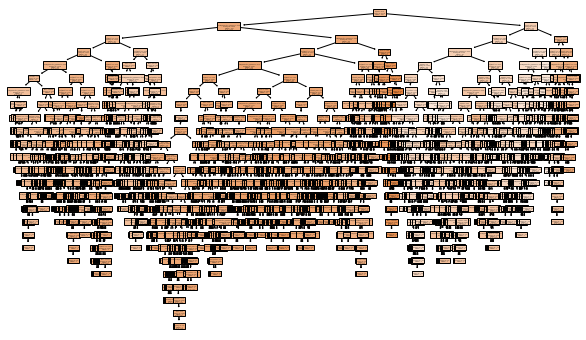

In [10]:
# Graficamos como está conformado el modelo sin límites
fig = plt.figure(figsize = (10,6))
tree.plot_tree(arbol, feature_names = x_train.columns, filled = True)
plt.show()

In [11]:
# max features. Para identificar la cantidad máxima de variables de nuestro modelo, en este caso es 3. 

max_features = np.sqrt(len(x_train.columns))
max_features

3.3166247903554

In [12]:
# max depth, Para identificar la profudidad máxima del modelo.
print(arbol.tree_.max_depth)

24


In [13]:
# hacemos las predicciones sobre los dos set de datos el X_test y el X_train
y_pred_test_dt = arbol.predict(x_test)
y_pred_train_dt = arbol.predict(x_train)

In [14]:
# Observamos las métricas, para lo cual se aplica esta función
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [mean_absolute_error(y_test, y_test_pred), mean_absolute_error(y_train, y_train_pred)],
                'MSE': [mean_squared_error(y_test, y_test_pred), mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_test_pred)), np.sqrt(mean_squared_error(y_train, y_train_pred))],
                'R2':  [r2_score(y_test, y_test_pred), r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df

In [15]:
# sacamos las métricas para ver si hay overfitting o unerfitting, para modificar la profundidad en función de estos resultados

dt_results1 = metricas(y_test, y_train, y_pred_test_dt, y_pred_train_dt, "Decission Tree I")
dt_results1

,MAE,MSE,RMSE,R2,set,modelo
0,1.455962e+00,6.585123e+00,2.566149e+00,0.92043,test,Decission Tree I
1,2.211233e-17,1.571175e-31,3.963805e-16,1.00000,train,Decission Tree I


Conclusiones:

- Debido a que el train da un R2 de 1 y un RMSE muy bueno, mientras que el test tiene un RMSE de 2.56, por tanto tienen mucha diferencia, en conclusión, entendemos que el modelo tiene overfitting.Por ello, debemos limitarlo.

Límites:

- Con base en el max_features, se decide utilizar un máximo de 3 variables.
- El max_depth es de 24, por lo que usaremos 8.

In [ ]:
df.shape

(2410, 12)

In [16]:
# Definimos un diccionario con los hiperparámetros que queremos modificar y los valores que queremos 

param = {"max_depth": [4,6, 8], 
        "max_features": [1,2,3],
        "min_samples_split": [20, 100, 200], # Elegimos esta combinación ya que tenemos 2410 registros.
        "min_samples_leaf": [20,100,200]} 


In [17]:
# Aplicamos el método GridSearch
gs = GridSearchCV(
            estimator=DecisionTreeRegressor(), # tipo de modelo
            param_grid= param, # hiperparámetros
            cv=10, # crossvalidation
            verbose=-1, # no printear mensaje en pantalla
            return_train_score = True, # métricas de train
            scoring="neg_mean_squared_error") # métrica que queremos

In [20]:
# Entrenamos el modelo con .fit()
gs.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'max_features': [1, 2, 3],
                         'min_samples_leaf': [20, 100, 200],
                         'min_samples_split': [20, 100, 200]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=-1)

In [21]:
# método para que elija el mejor estimador o combinación de valores
mejor_modelo = gs.best_estimator_
mejor_modelo

DecisionTreeRegressor(max_depth=8, max_features=3, min_samples_leaf=20,
                      min_samples_split=20)

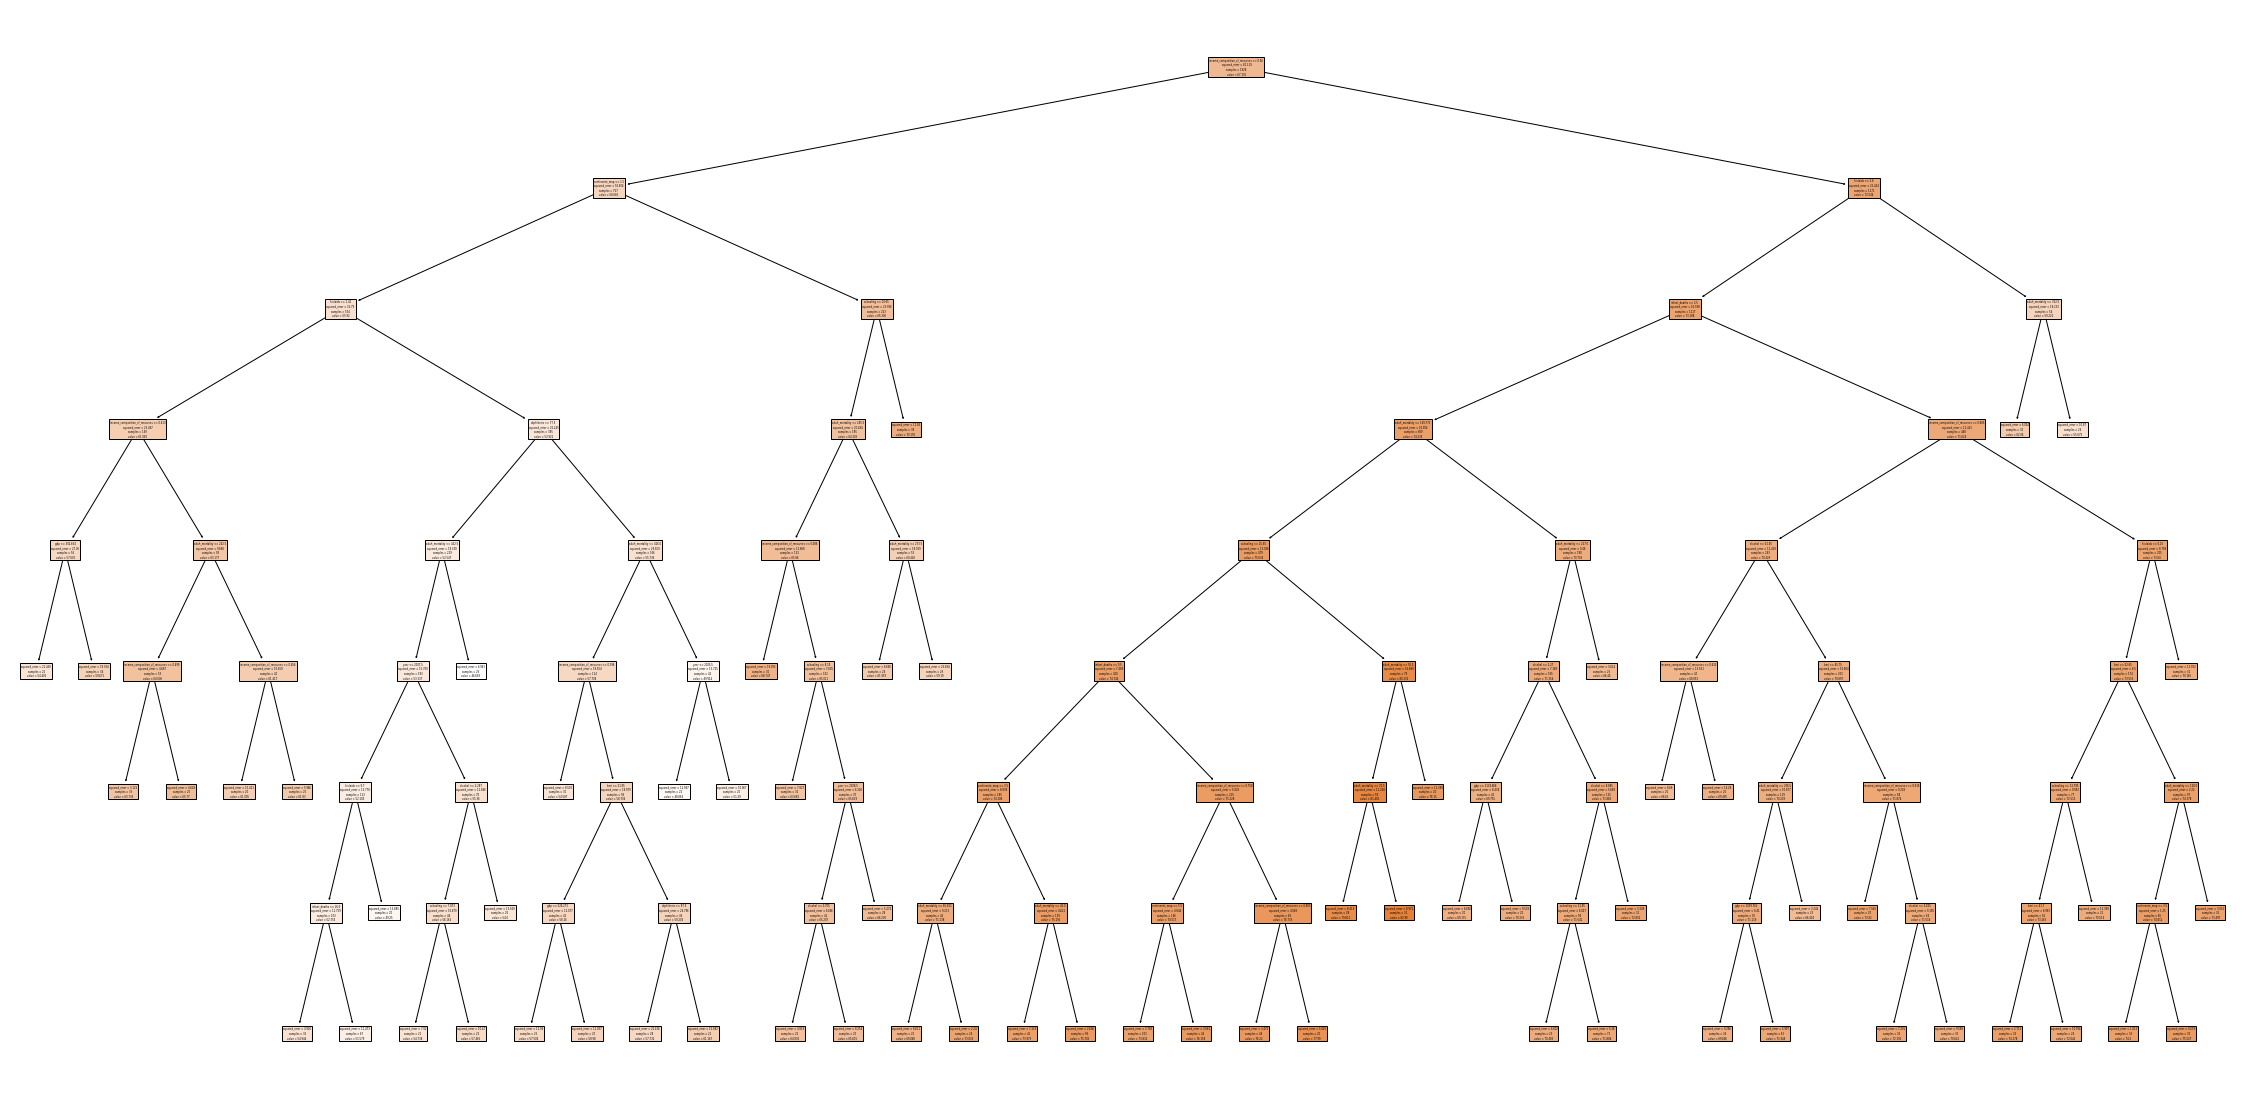

In [22]:
# Graficamos nuestro nuevo árbol


fig = plt.figure(figsize=(40, 20))
tree.plot_tree(mejor_modelo, feature_names=x_train.columns, filled=True);

In [23]:
# Aplicamos el método .predict() para calcular las métricas del mejor modelo.
y_pred_test_dt2 = mejor_modelo.predict(x_test)
y_pred_train_dt2 = mejor_modelo.predict(x_train)

In [24]:
# Cramos un df con las métricas de nuevo árbol
dt_results2 = metricas(y_test, y_train, y_pred_test_dt2, y_pred_train_dt2, "Decision tree II")
dt_results2

,MAE,MSE,RMSE,R2,set,modelo
0,2.234216,8.781272,2.963321,0.893893,test,Decision tree II
1,2.113445,8.168253,2.858016,0.899305,train,Decision tree II


In [25]:
# Concatenamos un df con las métricas del primer y segundo árbol
df_decision_results = pd.concat([dt_results1, dt_results2], axis = 0)
df_decision_results

,MAE,MSE,RMSE,R2,set,modelo
0,1.455962e+00,6.585123e+00,2.566149e+00,0.920430,test,Decission Tree I
1,2.211233e-17,1.571175e-31,3.963805e-16,1.000000,train,Decission Tree I
0,2.234216e+00,8.781272e+00,2.963321e+00,0.893893,test,Decision tree II
1,2.113445e+00,8.168253e+00,2.858016e+00,0.899305,train,Decision tree II


In [26]:
# Abrimos las métrica de la aplicación del método de regresión lineal sin estandarizar
df_results_sin_est = pd.read_csv("../files/metricas_sin_estandarizar.csv", index_col = 0)
df_results_sin_est

,MAE,MSE,RMSE,R2,set,modelo
0,2.886664,13.768914,3.710649,0.837093,test,Linear Regresion Estan
1,2.822864,14.303050,3.781937,0.822723,train,LinearRegression Estan


In [27]:
# Abrimos las métrica de la aplicación del método de regresión lineal con los datos estandarizados
df_results_estan = pd.read_csv("../files/metricas_estandarizado.csv", index_col = 0)
df_results_estan

,MAE,MSE,RMSE,R2,set,modelo
0,2.822991,13.322654,3.650021,0.839018,test,Linear Regresion
1,2.848104,14.453551,3.801783,0.821822,train,LinearRegression


In [28]:
# concatenamos todos los resultados

df_E_SE_DT_results = pd.concat([df_results_estan, df_results_sin_est, df_decision_results], axis = 0)
df_E_SE_DT_results

,MAE,MSE,RMSE,R2,set,modelo
0,2.822991e+00,1.332265e+01,3.650021e+00,0.839018,test,Linear Regresion
1,2.848104e+00,1.445355e+01,3.801783e+00,0.821822,train,LinearRegression
0,2.886664e+00,1.376891e+01,3.710649e+00,0.837093,test,Linear Regresion Estan
1,2.822864e+00,1.430305e+01,3.781937e+00,0.822723,train,LinearRegression Estan
0,1.455962e+00,6.585123e+00,2.566149e+00,0.920430,test,Decission Tree I
1,2.211233e-17,1.571175e-31,3.963805e-16,1.000000,train,Decission Tree I
0,2.234216e+00,8.781272e+00,2.963321e+00,0.893893,test,Decision tree II
1,2.113445e+00,8.168253e+00,2.858016e+00,0.899305,train,Decision tree II


In [30]:
# Guardamos el df con todos los resultados
df_E_SE_DT_results.to_csv("../files/resultados_Decision_Tree.csv")

In [31]:
# vamos a crearnos un dataframe con las variables predictoras según su importancia
importancia_predictores = pd.DataFrame(
                            {'predictor': x_train.columns,
                             'importancia': mejor_modelo.feature_importances_}
                            )


# ordenamos de mayor a menor los resultados
importancia_predictores.sort_values(by=["importancia"], ascending=False, inplace = True)

# printeamos los resultados
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores


Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
9,income_composition_of_resources,0.649216
7,hiv/aids,0.114192
0,continente_map,0.103955
2,adult_mortality,0.071174
10,schooling,0.023607
3,infant_deaths,0.015663
6,diphtheria,0.007833
4,alcohol,0.004105
1,year,0.003837
8,gdp,0.003758


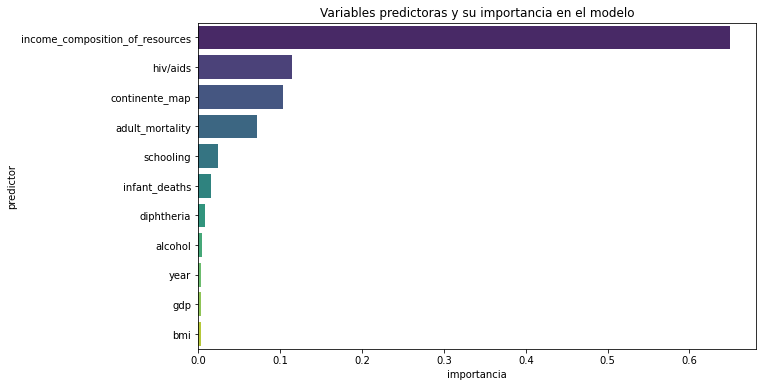

In [33]:
# por último graficamos los resultados

plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores, palette="viridis");
plt.title("Variables predictoras y su importancia en el modelo")
plt.show()
#plt.savefig("graficas/importancia_predictoras_DT.png")

# Conclusiones

- Comparad las métricas con el modelo hecho hasta ahora. ¿Cuál es mejor?

In [34]:
df_E_SE_DT_results.head(10)

,MAE,MSE,RMSE,R2,set,modelo
0,2.822991e+00,1.332265e+01,3.650021e+00,0.839018,test,Linear Regresion
1,2.848104e+00,1.445355e+01,3.801783e+00,0.821822,train,LinearRegression
0,2.886664e+00,1.376891e+01,3.710649e+00,0.837093,test,Linear Regresion Estan
1,2.822864e+00,1.430305e+01,3.781937e+00,0.822723,train,LinearRegression Estan
0,1.455962e+00,6.585123e+00,2.566149e+00,0.920430,test,Decission Tree I
1,2.211233e-17,1.571175e-31,3.963805e-16,1.000000,train,Decission Tree I
0,2.234216e+00,8.781272e+00,2.963321e+00,0.893893,test,Decision tree II
1,2.113445e+00,8.168253e+00,2.858016e+00,0.899305,train,Decision tree II


In [47]:
# Porcentaje de variabilidad. Esto es la edad máxima - la mínima
(2.96/((df['life_expectancy'].max())- (df['life_expectancy'].min()))) * 100

5.616698292220113

Observamos que el modelos generado por Decision tree II, donde ajustamos los parámetros, predice tanto en test como train con resultados buenos, donde R2 es del 89%, es decir, las variables predictoras explican el resultado en un 89%. El RMSE es de 2.85 años en el caso de train y de 2.96 años en el test. Conparando estos resultados con los otros modelos, específicamente con la regresión lienal, se observa que el modelo se ajusta mejor, adicionalmente hay que considerar que en la regresion lineal no se pudo normalizar la variable respuesta.

Por comparar, en el modelo de regresión lineal tenía un RMSE en los datos no estandarizados era de 3.71 años y la variablidad estaba en torno a un 7% y en este modelo el RMSE es de 2.85 años y la variablidad de cerca del 5.61%.